In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_MA
@pyimport GLS_Apr_weekend_ext

In [2]:
numNodes = Compute_Jacobian_MA.numNodes;
numLinks = Compute_Jacobian_MA.numLinks;
numODpairs = Compute_Jacobian_MA.numODpairs;
numZones = Compute_Jacobian_MA.numZones
od_pairs = Compute_Jacobian_MA.od_pairs;
link_list_js = Compute_Jacobian_MA.link_list_js;
link_length_list = Compute_Jacobian_MA.link_length_list;

flow_observ = GLS_Apr_weekend_ext.x_;

In [3]:
require("../Julia_files/initia_data.jl");
require("prepare_data_MA.jl");
require("extract_data_MA.jl");
require("../Julia_files/tap_MSA.jl");
require("../Julia_files/inverseVI.jl");
require("../Julia_files/demands_adjustment_gradi.jl");

In [4]:
# demandsDict_ = readall("../08_develop_new_OD_demand_estimator_MA_Dijkstra_uni_class_Apr_weekend/results/demandsDict29.json");
# demandsDict_ = JSON.parse(demandsDict_);

In [5]:
# demandsDict_

In [6]:
# demandsDict__ = demandsDict_["32"]

# _demandsDict__ = Dict()

# for key_ in keys(demandsDict__)
#     key = (int(split(split(key_, ",")[1], "(")[2]),int(split(split(key_, ",")[2], ")")[1]))
#     _demandsDict__[key] = demandsDict__[key_]
# end

In [7]:
# _demandsDict__

In [8]:
# demandsDict[0] = _demandsDict__;
# demandsDict[1] = _demandsDict__;

In [9]:
demandsDict

Dict{Int64,Dict{(Int64,Int64),Float64}} with 2 entries:
  0 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…
  1 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…

In [10]:
demandsDiffDict[1] = norm(demandsDicToVec(demandsDict[1]) - demandsDicToVec(demandsDict[0]))/
                     norm(demandsDicToVec(demandsDict[0]));

In [11]:
demandsDiffDict[1]

0.0

In [12]:
weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29]

day = 29  # day of April

29

In [13]:
# observed flow vector
xl = flow_observ[:, day]

74-element Array{Float64,1}:
 1624.03  
 1273.13  
 1608.83  
 1959.73  
   40.0646
  146.69  
 1109.21  
  651.679 
 1629.54  
 2087.07  
  455.737 
  239.965 
  268.26  
    ⋮     
  517.807 
  649.479 
  334.718 
  319.617 
  200.642 
  200.642 
   82.1073
   82.1073
 1071.01  
 1072.97  
 1115.65  
 1113.68  

In [14]:
tapFlows = Dict{(Int64,Int64),Float64}()

for i = 1:length(ta_data.start_node)
    key = (ta_data.start_node[i], ta_data.end_node[i])
    tapFlows[key] = xl[i]
end

tapFlowVect = xl;

In [15]:
# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapFlows, tapFlowVect;

In [16]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[0]);

In [17]:
arcsDict[0]

Dict{(Int64,Int64),Arc} with 74 entries:
  (17,15) => Arc(17,15,5941.509547,0.243392,1072.9690778826957)
  (3,6)   => Arc(3,6,6438.424264,0.117963,1629.5399640625856)
  (21,13) => Arc(21,13,2068.636909,0.103075,110.45965036536383)
  (22,16) => Arc(22,16,5826.794762,0.118731,200.64212338179968)
  (19,12) => Arc(19,12,5540.728327,0.069605,712.6799685390347)
  (22,14) => Arc(22,14,4285.78757,0.079134,82.1073093894244)
  (15,17) => Arc(15,17,5726.051257,0.245197,1071.0051799057337)
  (10,11) => Arc(10,11,2934.51529,0.211194,489.4331395825477)
  (13,12) => Arc(13,12,918.190114,0.474671,1.7822158335598242e-10)
  (3,1)   => Arc(3,1,8000.0,0.179745,1959.7343541170915)
  (16,13) => Arc(16,13,5859.480324,0.169855,649.4787402369171)
  (4,5)   => Arc(4,5,6000.0,0.043136,1199.264320887951)
  (13,16) => Arc(13,16,5396.837063,0.158994,517.8071592676686)
  (17,16) => Arc(17,16,5877.602649,0.208304,1113.6816442531579)
  (20,13) => Arc(20,13,2251.546038,0.137259,148.97489067535872)
  (12,8)  => Arc(12,8

In [18]:
deg = 6
c = 0.5
lam = 10000.0

coeffs_dict_Apr_PM_ = readall("../temp_files/coeffs_dict_Apr_weekend.json")
coeffs_dict_Apr_PM_ = JSON.parse(coeffs_dict_Apr_PM_)
fcoeffs = coeffs_dict_Apr_PM_["($(deg),$(c),$(lam),1)"]

7-element Array{Any,1}:
  1.0       
  0.00268857
  0.0114664 
 -0.00834401
  0.0234205 
 -0.0137301 
  0.00429399

INFO: Loading help data...


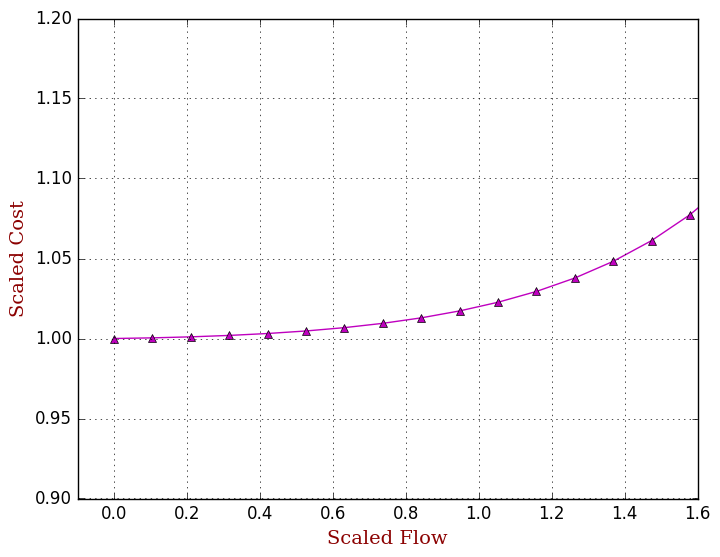

In [19]:
using PyPlot

est_coeffs = fcoeffs

xs = linspace(0, 2, 20)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs, "^-m")

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 1.2);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA.pdf")

In [20]:
demandsVecDict[1] = demandsDicToVec(demandsDict[1]);
objFunDict[1] = objF(demandsVecDict[1], fcoeffs);

In [21]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [22]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[1]);

In [23]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], fcoeffs);

In [24]:
linkCostDicDict[1]["0"], link_length_list[1]

(0.1626805575171639,0.0)

In [25]:
jacobiSpiessDict[1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[1]["$(i)"] for i=0:numLinks-1]);

In [26]:
# maximum number of iterations
N = 100;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [27]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], epsilon_1);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDict[l], fcoeffs, searchDirecDict[l], 
    thetaMaxDict[l], rho, M);
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], fcoeffs);
        
    arcsDict[l+1] = observFlow("./benchmark_data/MA_net_Apr_weekend_ext.txt", tapFlowDicDict[l+1]);
        
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], fcoeffs);
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[l+1]["$(i)"] for i=0:numLinks-1]);
        
    demandsDiffDict[l+1] = norm(demandsVecDict[l+1] - demandsVecDict[0]) / norm(demandsVecDict[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
  
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [28]:
demandsVecDict

Dict{Any,Any} with 13 entries:
  2  => [0.0,10.732800386521182,343.94760946040844,0.0,21.60377631549601,259.35…
  11 => [3.1225594253574327,58.04716555953427,323.38266324708167,2.864047339342…
  0  => [0.0,0.0,364.030563,0.0,0.0,325.36421,0.0,0.0,0.0,0.0,387.087581,543.74…
  7  => [0.0,44.46835773473908,321.5514598612234,0.0,87.28174153840905,166.0729…
  9  => [1.838121242342546,53.127356981026594,322.4056007782598,1.6000147706386…
  10 => [2.8543103102971275,57.03875394120806,323.1712297371616,2.6020131167170…
  8  => [1.8151210066623988,53.03871066066482,322.388312394778,1.57734893286594…
  6  => [0.0,22.479084192577034,334.10113557061726,0.0,44.67054945595972,220.98…
  4  => [0.0,15.55829915437845,339.2342129518139,0.0,31.138160212932664,241.584…
  3  => [0.0,15.176216459239566,339.54551604070724,0.0,30.38837782359359,242.79…
  5  => [0.0,19.271417876587787,336.258318105906,0.0,38.41990909855282,229.9147…
  12 => [3.1225594253574327,58.04716555953427,323.38266324708167,2.86404733934

In [29]:
norObjFunDict

Dict{Any,Any} with 12 entries:
  2  => 0.5394708083243546
  11 => 0.14330360842390752
  7  => 0.17710642895719914
  9  => 0.15279811887175046
  10 => 0.14513525188962498
  8  => 0.15298886340585832
  6  => 0.3469859509519519
  4  => 0.4408422065971378
  3  => 0.447156438154242
  5  => 0.3849497402713147
  12 => 0.14330360842390752
  1  => 1.0

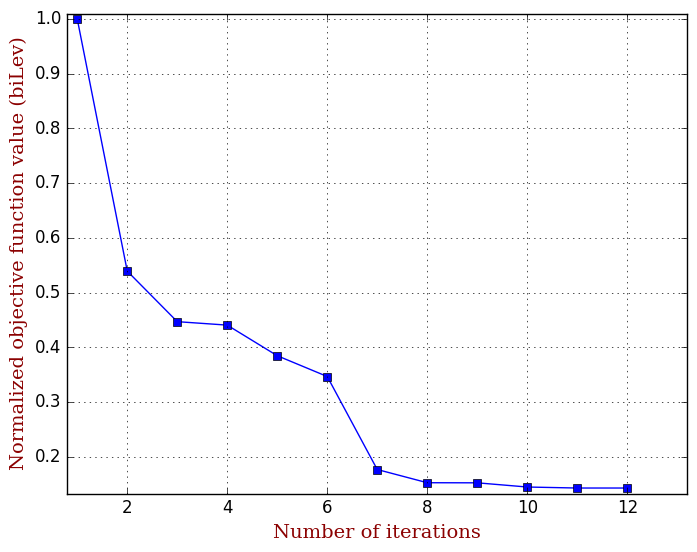

In [30]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_MA.pdf")

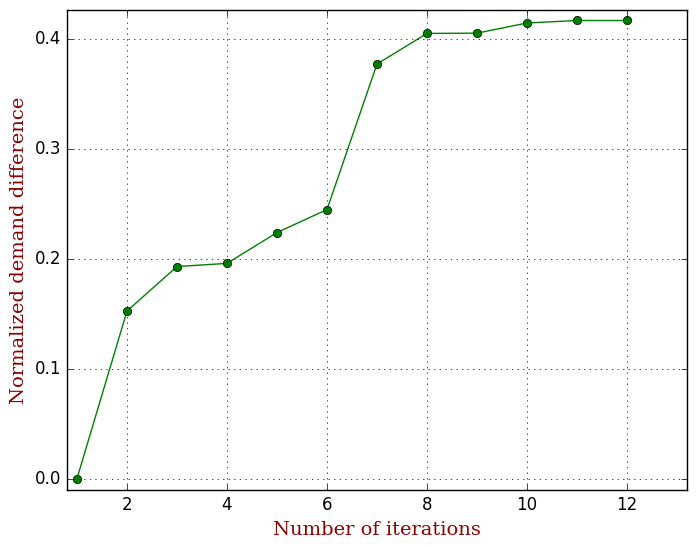

In [31]:
using PyPlot

iterNum = 1:(length(demandsDiffDict))

demandsDiff = map(iterNum->demandsDiffDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDict) + 1 + .2)
ylim(minimum(demandsDiff)-.01, maximum(demandsDiff)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_MA.pdf")

In [32]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [33]:
outfile = open("./results/demandsDiffDict.json", "w")

JSON.print(outfile, demandsDiffDict)

close(outfile)

In [34]:
outfile = open("./results/demandsVecDict.json", "w")

JSON.print(outfile, demandsVecDict)

close(outfile)

In [35]:
outfile = open("./results/demandsDict$(day).json", "w")

JSON.print(outfile, demandsDict)

close(outfile)

In [36]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [37]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)

In [38]:
demandsDict[length(demandsDict)-1]

Dict{(Int64,Int64),Float64} with 484 entries:
  (6,9)   => 0.0
  (18,3)  => 30.30523403637834
  (21,13) => 3.978106388211295
  (22,16) => 0.0
  (15,17) => 31.275087606057394
  (22,14) => 0.0
  (13,9)  => 0.0
  (8,9)   => 0.0
  (9,1)   => 0.0
  (17,14) => 400.2322792000022
  (16,6)  => 0.0
  (16,12) => 335.8490757777887
  (16,13) => 757.0287258759668
  (22,2)  => 0.0
  (7,16)  => 447.9942931744204
  (1,12)  => 367.68752845306244
  (4,5)   => 8.757717471892947
  (11,8)  => 20.14340100885481
  (18,21) => 0.0
  (19,4)  => 0.0
  (20,13) => 5.279775254461828
  (15,4)  => 50.19712613935169
  (6,18)  => 0.14264661071991025
  (5,16)  => 0.0
  (4,9)   => 0.0
  ⋮       => ⋮

In [39]:
demandsDict_ = Dict{}()

for key in keys(demandsDict[length(demandsDict)-1])
    demandsDict_[key] = demandsDict[length(demandsDict)-1][key] 
end

In [40]:
# weekend_Apr_list = [1, 7, 8, 14, 15, 21, 22, 28, 29]

outfile = open("./results/demandsDictFixed$(day).json", "w")

JSON.print(outfile, demandsDict_)

close(outfile)